# HRF Mark 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

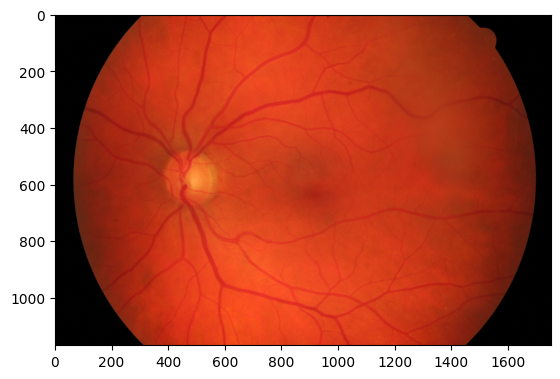

In [2]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
plt.imshow(hrf_res)

In [3]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [4]:
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

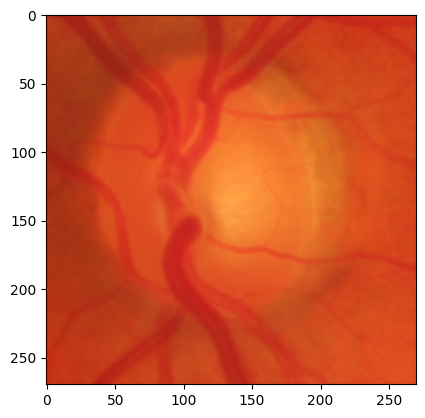

In [5]:
plt.imshow(roi)

In [6]:
blue = roi[:,:,1].copy()

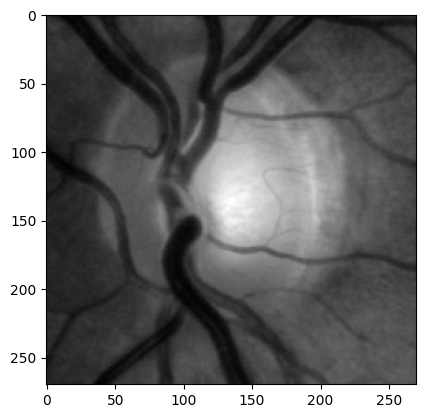

In [7]:
plt.imshow(blue, 'gray')

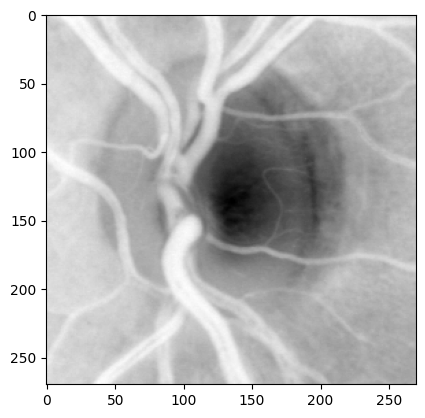

In [8]:
grinv = 255-blue.copy()
plt.imshow(grinv, 'gray')

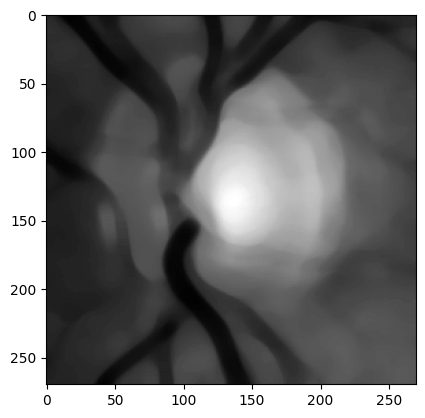

In [20]:
medblue = cv2.medianBlur(blue.copy(), 15)
plt.imshow(medblue, 'gray')

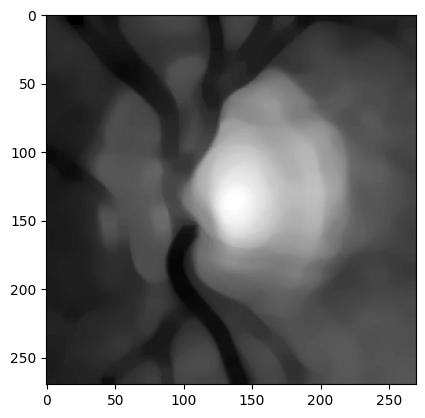

In [21]:
dilation = cv2.dilate(medblue.copy(), np.ones((10,10), np.uint8))
erosion = cv2.erode(dilation.copy(), np.ones((8,8), np.uint8))
plt.imshow(erosion, 'gray')

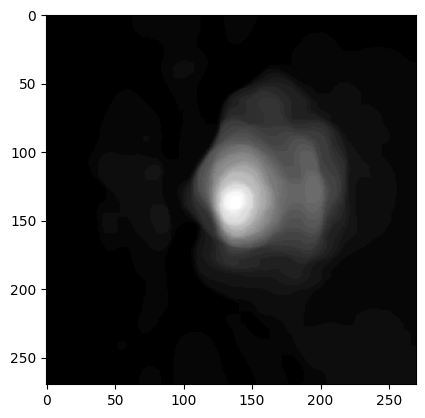

In [22]:
erogamma = adjust_gamma(erosion.copy(), 4)
plt.imshow(erogamma, 'gray')

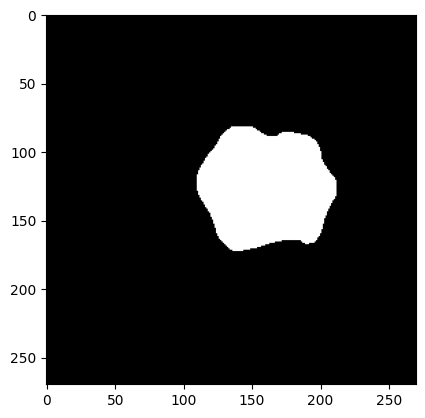

In [23]:
ret2,th2 = cv2.threshold(erogamma,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, 'gray')

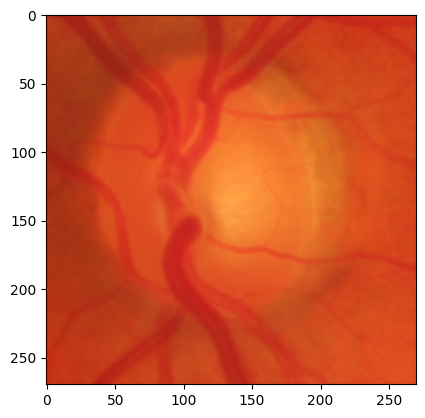

In [24]:
plt.imshow(roi)

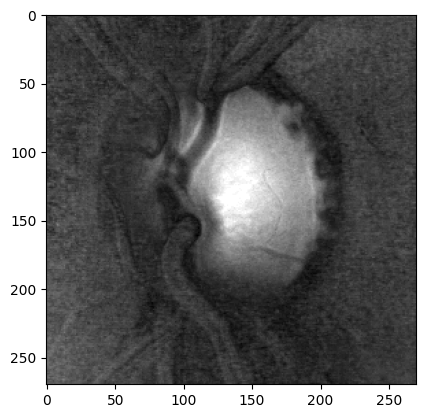

In [28]:
hls = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2HLS)
plt.imshow(hls[:,:,2], 'gray')

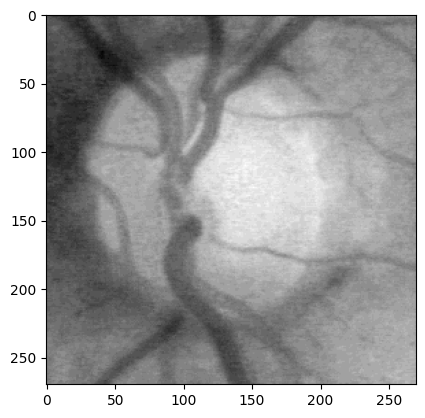

In [35]:
lab = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2LAB)
plt.imshow(lab[:,:,2], 'gray')

In [37]:
lolock = hls[:,:,2].copy()

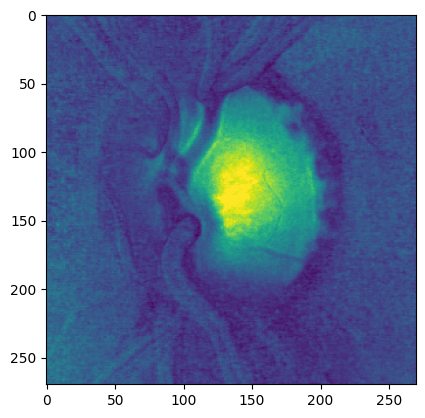

In [38]:
plt.imshow(lolock)

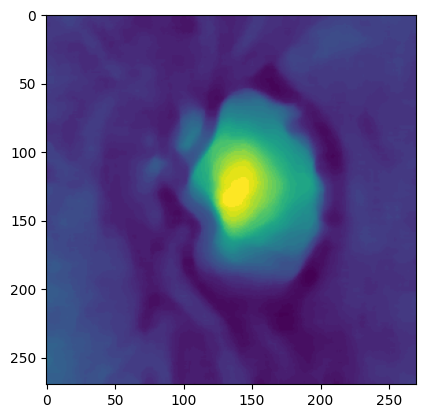

In [48]:
blurlolock = cv2.medianBlur(lolock.copy(), 13)
plt.imshow(blurlolock)

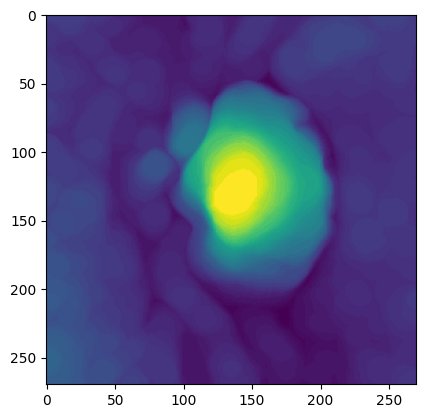

In [52]:
dilation = cv2.dilate(blurlolock.copy(), 
                     cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                              (13,13)))
plt.imshow(dilation)

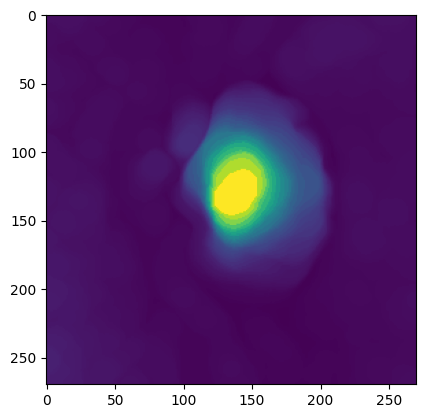

In [54]:
gmdl = adjust_gamma(dilation.copy(), 10)
plt.imshow(gmdl)

In [55]:
ret2,th2 = cv2.threshold(gmdl.copy(),0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)

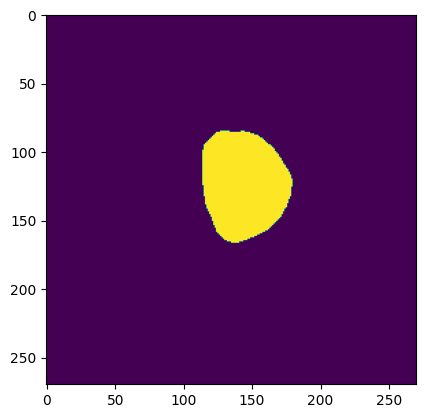

In [56]:
plt.imshow(th2)

In [57]:
cont, hcy = cv2.findContours(th2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [60]:
for c in cont:
    print(c.shape[0])

98


In [61]:
roic = roi.copy()
thhh = th2.copy()
if len(cont) > 1:
    conts = np.array([c.shape[0] for c in cont])
    cont_idx = np.argmax(conts)
    ellipse = cv2.fitEllipse(cont[cont_idx])
else:
    ellipse = cv2.fitEllipse(cont[0])
    
od = np.zeros_like(thhh, dtype='uint8')
cv2.ellipse(od, ellipse, (255, 255, 255), -1)
cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)

array([[[178,  55,  23],
        [177,  54,  22],
        [175,  52,  21],
        ...,
        [209,  58,  29],
        [207,  58,  28],
        [206,  57,  27]],

       [[182,  57,  24],
        [179,  55,  23],
        [178,  53,  23],
        ...,
        [206,  57,  25],
        [204,  55,  23],
        [204,  55,  25]],

       [[183,  60,  26],
        [182,  58,  26],
        [180,  56,  26],
        ...,
        [204,  54,  25],
        [203,  53,  25],
        [203,  54,  25]],

       ...,

       [[193,  51,  23],
        [194,  50,  23],
        [196,  51,  22],
        ...,
        [224,  77,  34],
        [223,  76,  32],
        [222,  76,  32]],

       [[196,  52,  24],
        [195,  52,  22],
        [196,  53,  23],
        ...,
        [224,  75,  33],
        [224,  76,  33],
        [223,  76,  32]],

       [[197,  54,  21],
        [195,  54,  21],
        [196,  53,  21],
        ...,
        [224,  75,  32],
        [224,  75,  32],
        [223,  77,  30]]

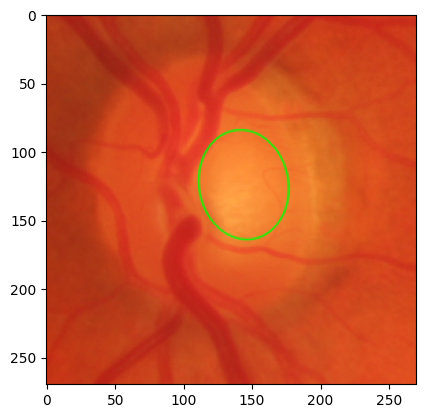

In [62]:
plt.imshow(roic)